In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('final-employee-ds.csv')
df.head()

,EmployeeID,Name,Age,Gender,Department,ExperienceYears,Salary,WorkHoursPerWeek,PerformanceScore,JoinDate,Tshirt_size,ProjectCount,TrainingHours,DepartmentRating
0,101,Employee_1,50,Male,IT,17,86175.0,44,71,2010-01-10,L,2,4,1
1,102,Employee_2,36,Male,Finance,1,47805.0,44,68,2017-11-11,S,4,18,4
2,103,Employee_3,29,Male,Marketing,16,45237.0,44,69,2012-03-08,S,6,13,3
3,104,Employee_4,42,Male,Marketing,12,60056.0,48,76,2012-10-12,M,2,25,4
4,105,Employee_5,40,Female,Finance,19,85543.0,36,97,2014-12-30,XL,8,3,4


### Question : 1
Load the TrainingHours column into a NumPy array.
Convert to float datatype


Find mean & standard deviation

Final output: Two numeric values


In [42]:
training_hours = np.array(df['TrainingHours'])
training_hours = training_hours.astype(float)

training_hours_mean = np.mean(training_hours)
training_hours_std = np.std(training_hours)

print("Mean:", training_hours_mean)
print("Standard Deviation:", training_hours_std)


Mean: 24.19
Standard Deviation: 13.842467265628624


### Question : 2
Handle missing values (if any):
Fill missing Salary with department-wise median


Calculate total Salary sum for employees with ExperienceYears > 12 and ProjectCount > 5
 
Final output: One numeric value


In [43]:
df['Salary'] = df.groupby('Department')['Salary'].transform(lambda x: x.fillna(x.median()))

total_sum = df[(df['ExperienceYears'] > 12) & (df['ProjectCount'] > 5)]['Salary'].sum()
print("Total Salary", total_sum)


Total Salary 1985775.5



### Question : 3
Filter employees who:

Department = "IT" or "Finance"

Age between 30–45

PerformanceScore > 88

Sort by Salary descending

Final output: Table with Name, Department, Salary, PerformanceScore

In [44]:
dept = (df['Department'] == "IT") | (df['Department'] == "Finance")
age = (df['Age'] >= 30) & (df['Age'] <= 45)
performance = df['PerformanceScore'] > 88
employee = df[dept & age & performance].sort_values(by='Salary', ascending=False)

print(employee[['Name','Department','Salary','PerformanceScore']])

           Name Department    Salary  PerformanceScore
94  Employee_95         IT  140386.0                94
88  Employee_89    Finance  126027.0                92
4    Employee_5    Finance   85543.0                97
32  Employee_33         IT   83919.0                98
55  Employee_56    Finance   49540.0                94


### Question : 4
Add new column SalaryPerHour = Salary ÷ (WorkHoursPerWeek × 4)

Filter top 5 employees by SalaryPerHour
 
Final output: Table(5 Rows) with Name, SalaryPerHour







In [45]:
df['SalaryPerHour'] = df['Salary']/ (df['WorkHoursPerWeek'] * 4)

top_five = df.sort_values(by='SalaryPerHour', ascending=False).head(5)

print(top_five[['Name','SalaryPerHour']])

           Name  SalaryPerHour
46  Employee_47     981.278571
27  Employee_28     971.292857
31  Employee_32     967.392857
79  Employee_80     945.335526
80  Employee_81     937.858974


### Question : 5
Create a bar chart showing the count of employees in each Department, separated by Gender. You can solve the question with any of the package (Matplotlib , Seaborn , Plotly )
Dataset Columns Used:
Department → Categorical variable (IT, Finance, HR, Marketing, Management)


Gender → Categorical variable (Male, Female)

Expected Output
A bar chart where:


x-axis → Department


y-axis → Number of employees


Each bar split into Male and Female segments


Colors differentiate gender


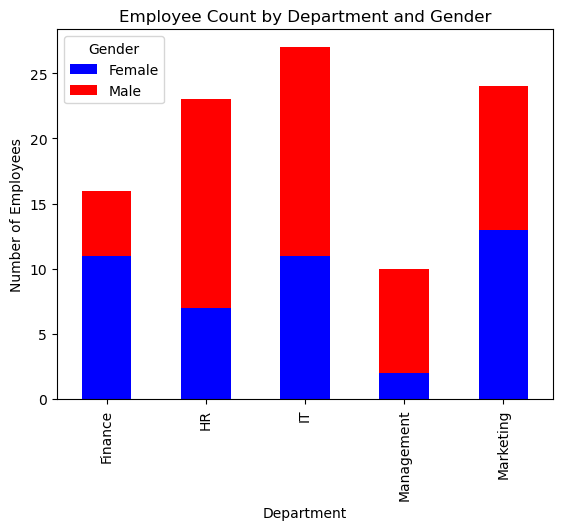

In [46]:
dept_gender = pd.crosstab(df['Department'],df[ 'Gender'])
dept_gender.plot(kind='bar', stacked=True, color=['blue', 'red'])
plt.title('Employee Count by Department and Gender')
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.show()
